In [2]:
from framestack import FrameStack
import cv2
import numpy as np
from game_state import GameState
import datetime
import keyboard
import pyautogui
import win32gui
import win32ui
import win32con
from utils import move_window_to_top_left
from torchvision import transforms
from time import sleep
import matplotlib.pyplot as plt

In [3]:
framestack = FrameStack(framestack_skip=4)

In [9]:
sleep(5)

frames = framestack.get_frames()

print(len(frames))

frame_1 = frames[0]
print(frame_1.shape)

# Sum all values in the first frame
print(np.sum(frame_1))

4
(720, 1280, 3)
197929471


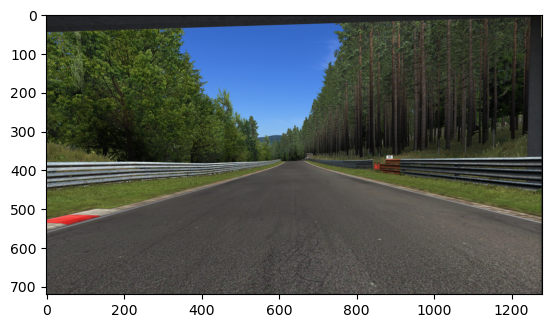

In [10]:
plt.imshow(cv2.cvtColor(frames[0], cv2.COLOR_BGR2RGB))
plt.show()

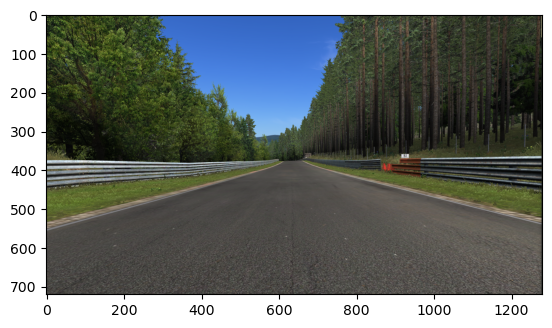

In [11]:
plt.imshow(cv2.cvtColor(frames[1], cv2.COLOR_BGR2RGB))
plt.show()

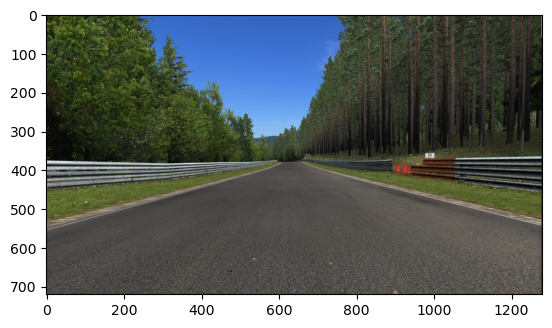

In [13]:
plt.imshow(cv2.cvtColor(frames[2], cv2.COLOR_BGR2RGB))
plt.show()

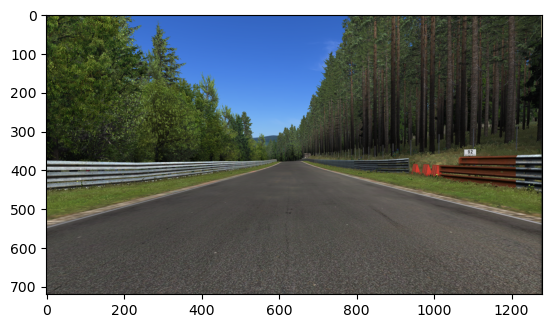

In [14]:
plt.imshow(cv2.cvtColor(frames[3], cv2.COLOR_BGR2RGB))
plt.show()

In [21]:
frames_batch_1 = framestack.get_frames()
frames_batch_2 = framestack.get_frames()

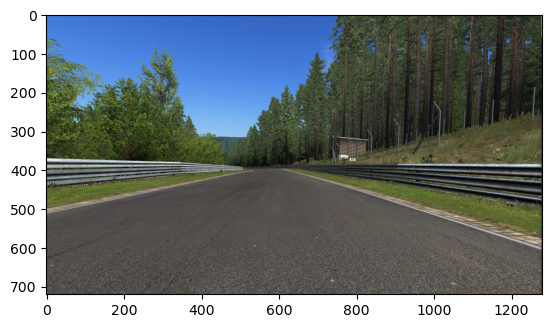

In [22]:
plt.imshow(cv2.cvtColor(frame_batch_1[3], cv2.COLOR_BGR2RGB))
plt.show()

In [18]:
frames_batch_1 == frames_batch_2

True

***
### Testing framestacks

In [1]:
from framestack import FrameStack
import cv2
import numpy as np
from game_state import GameState
import datetime
import keyboard
import pyautogui
import win32gui
import win32ui
import win32con
from utils import move_window_to_top_left
from torchvision import transforms
from time import sleep
import matplotlib.pyplot as plt

In [2]:
framestack = FrameStack(framestack_skip=4)

In [3]:
frame_stacks = {}

In [4]:
sleep(3)

for _ in range(10):

    frame_batch = framestack.get_frames()
    frame_stacks[datetime.datetime.now().strftime("%H:%M:%S.%f")] = frame_batch
    
        
    sleep(1/12)


In [5]:
frame_stacks_backup = frame_stacks.copy()
# frame_stacks = frame_stacks_backup

In [6]:
len(frame_stacks)

10

In [7]:
prev_key = None

for key in frame_stacks.keys():
    if prev_key is not None:
        print(f"{key}, time difference: {(datetime.datetime.strptime(key, '%H:%M:%S.%f') - datetime.datetime.strptime(prev_key, '%H:%M:%S.%f'))}")
    else:
        print(f"{key}")
    prev_key = key

15:36:25.841956
15:36:25.925956, time difference: 0:00:00.084000
15:36:26.009954, time difference: 0:00:00.083998
15:36:26.093954, time difference: 0:00:00.084000
15:36:26.177955, time difference: 0:00:00.084001
15:36:26.261980, time difference: 0:00:00.084025
15:36:26.346020, time difference: 0:00:00.084040
15:36:26.430022, time difference: 0:00:00.084002
15:36:26.513807, time difference: 0:00:00.083785
15:36:26.597824, time difference: 0:00:00.084017


In [8]:
frame_batch[0].shape

(720, 1280, 3)

In [9]:
np.sum(frame_batch[0])

309816865

In [10]:
frame_batch[1].shape

(720, 1280, 3)

In [11]:
np.sum(frame_batch[1])

308601683

In [12]:
# Test if the framestack is working, o is frame, x is discarded frame
#            0 1 2 3
# t=0:       o o o o
# t=1:     x o o o o
# t=2:   x x o o o o
# t=3: x x x o o o o
# etc...

In [13]:
t_0 = list(frame_stacks.keys())[0]
t_1 = list(frame_stacks.keys())[1]
t_2 = list(frame_stacks.keys())[2]
t_3 = list(frame_stacks.keys())[3]

In [14]:
t_n = list(frame_stacks.keys())[:4]

In [15]:
len(frame_stacks[t_0])

4

In [16]:
# First frame of t=0
frame_stacks[t_0][0].shape

(720, 1280, 3)

In [17]:
# Second frame of t=1
frame_stacks[t_1][1].shape

(720, 1280, 3)

In [24]:
times = list(frame_stacks.keys())[:4]
t_0 = times[0]
t_n = times[1:4]

print(times)
print()
for t in t_n:
    for j in range(4):
        if np.array_equal(frame_stacks[t_0][1], frame_stacks[t][j]):
            print(f"Frame at time {t_0} is equal to frame at time {t} at index {j}")

['15:36:25.841956', '15:36:25.925956', '15:36:26.009954', '15:36:26.093954']

Frame at time 15:36:25.841956 is equal to frame at time 15:36:25.925956 at index 0


In [33]:
# Checking if frames 1-3 of t=0 are equal to frames 0-2 of t=1
times = list(frame_stacks.keys())[:4]
for t in range(len(times)-1):
    t_n = times[t]
    t_n_plus_1 = times[t+1]
    print(f"For frame at time {t_n}:")
    for i in range(3):
        if np.array_equal(frame_stacks[t_n][i+1], frame_stacks[t_n_plus_1][i]):
            print(f"Frame at index {i+1} is equal to frame at time {t_n_plus_1} at index {i}")
    print()

For frame at time 15:36:25.841956:
Frame at index 1 is equal to frame at time 15:36:25.925956 at index 0
Frame at index 2 is equal to frame at time 15:36:25.925956 at index 1
Frame at index 3 is equal to frame at time 15:36:25.925956 at index 2

For frame at time 15:36:25.925956:
Frame at index 1 is equal to frame at time 15:36:26.009954 at index 0
Frame at index 2 is equal to frame at time 15:36:26.009954 at index 1
Frame at index 3 is equal to frame at time 15:36:26.009954 at index 2

For frame at time 15:36:26.009954:
Frame at index 1 is equal to frame at time 15:36:26.093954 at index 0
Frame at index 2 is equal to frame at time 15:36:26.093954 at index 1
Frame at index 3 is equal to frame at time 15:36:26.093954 at index 2



Working!
***

### Only return framestack.get_frames() when the framestack is full

In [10]:
from framestack import FrameStack
import cv2
import numpy as np
from game_state import GameState
import datetime
import keyboard
import pyautogui
import win32gui
import win32ui
import win32con
from utils import move_window_to_top_left
from torchvision import transforms
from time import sleep
import matplotlib.pyplot as plt
from collections import deque
import torch
import pandas as pd
from PIL import Image

In [21]:
queue = deque(maxlen=4)

print(len(queue))
print(queue)

queue.append(1)
print(len(queue))
print(queue)

queue.append(2)
queue.append(3)
queue.append(4)
queue.append(5)

print(len(queue))
print(queue)

0
deque([], maxlen=4)
1
deque([1], maxlen=4)
4
deque([2, 3, 4, 5], maxlen=4)


In [6]:
framestack = FrameStack(framestack_skip=4)

In [7]:
framestack.frames

deque([], maxlen=4)

In [8]:
framestack.start()
frames_1 = framestack.frames
print(len(frames_1))
sleep(1)
frames_2 = framestack.frames
print(len(frames_2))
framestack.stop()

0
4


In [9]:
frames_recorded, total_frames = framestack.frame_count

12

In [18]:
np.array(frames_2).shape

(4, 720, 1280, 3)

***
### Testing frames as numpy and custom transform

In [18]:
framestack = FrameStack(framestack_skip=4)

framestack.start()
sleep(1)
game_frames = framestack.get_frames()
framestack.stop()

In [19]:
type(game_frames)

numpy.ndarray

In [20]:
game_frames.shape

(4, 720, 1280, 3)

In [54]:
class CustomTransform:

    def __init__(self):
        self.resize = transforms.Resize((84,84))
        self.normalize = transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.228, 0.228, 0.228])

    def __call__(self, frames):
        result = []
        for frame in frames:
            # Convert to PIL image
            pil_image = Image.fromarray(frame.astype('uint8'))
            # Crop top half of the frame
            width, height = pil_image.size
            pil_image = pil_image.crop((0, height // 2, width, height))
            # Resize
            frame = self.resize(pil_image)
            # Convert to tensor
            tensor = transforms.ToTensor()(frame)
            # Normalize
            tensor = self.normalize(tensor)
            result.append(tensor)

        return torch.stack(result)

In [55]:
preprocess = CustomTransform()

In [56]:
frames = np.random.randint(256, size=(4, 720, 1280, 3), dtype=np.uint8)  # this is your array
processed_frames = preprocess(frames)

In [57]:
frames.shape

(4, 720, 1280, 3)

In [58]:
processed_frames.shape

torch.Size([4, 3, 84, 84])

In [59]:
type(processed_frames)

torch.Tensor

In [60]:
test_frame = frames[0]
print(test_frame.shape)

test_preprocessed_frame = processed_frames[0]
print(test_preprocessed_frame.shape)

(720, 1280, 3)
torch.Size([3, 84, 84])


In [61]:
test_frame[0]

array([[199, 109, 105],
       [ 47, 255,  73],
       [162,  31, 210],
       ...,
       [196, 165, 125],
       [166, 211, 168],
       [ 28, 117, 165]], dtype=uint8)

In [62]:
test_preprocessed_frame[0]

tensor([[ 0.0774,  0.0430,  0.0258,  ...,  0.0430, -0.0602,  0.1462],
        [-0.0946,  0.1806,  0.0430,  ...,  0.0602, -0.0430,  0.0258],
        [ 0.0774,  0.0774, -0.1462,  ...,  0.0430,  0.0602, -0.0086],
        ...,
        [ 0.0430,  0.0258,  0.0602,  ...,  0.0602,  0.0774,  0.0430],
        [ 0.0086,  0.1634,  0.1290,  ...,  0.0774,  0.0430,  0.0602],
        [ 0.0430,  0.0602,  0.0086,  ...,  0.0774,  0.0258, -0.0258]])

In [63]:
print(np.mean(test_preprocessed_frame[0].numpy()))
print(np.std(test_preprocessed_frame[0].numpy()))
print()
print(np.mean(test_preprocessed_frame[1].numpy()))
print(np.std(test_preprocessed_frame[1].numpy()))
print()
print(np.mean(test_preprocessed_frame[2].numpy()))
print(np.std(test_preprocessed_frame[2].numpy()))

-0.0017525846
0.10505358

0.00048027624
0.105209865

-0.0023108013
0.10620938


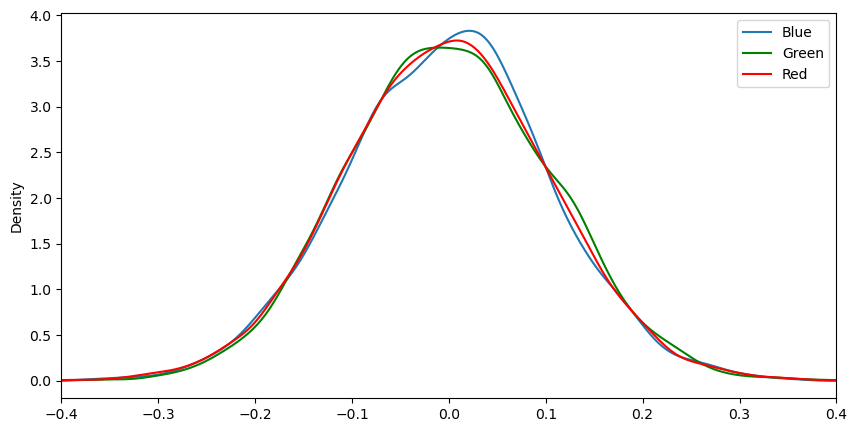

In [70]:
plt.figure(figsize=(10,5))
pd.Series(test_preprocessed_frame[0].numpy().flatten()).plot.kde(label="Blue")
pd.Series(test_preprocessed_frame[1].numpy().flatten()).plot.kde(label="Green", color="green")
pd.Series(test_preprocessed_frame[2].numpy().flatten()).plot.kde(label="Red", color="red")
plt.xlim(-0.4,0.4)
plt.legend()
plt.show()

***

In [1]:
from framestack import FrameStack
import cv2
import numpy as np
from game_state import GameState
import datetime
import keyboard
import pyautogui
import win32gui
import win32ui
import win32con
from utils import move_window_to_top_left
from torchvision import transforms
from time import sleep
import matplotlib.pyplot as plt
from collections import deque
import torch
from PIL import Image

In [2]:
framestack = FrameStack(framestack_skip=4)

framestack.start()
sleep(1)
game_frames = framestack.get_frames()
framestack.stop()

In [13]:
class BumperTransform:

    def __init__(self):
        self.resize = transforms.Resize((84,84))
        self.normalize = transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.228, 0.228, 0.228])

    def __call__(self, frames):
        result = []
        for frame in frames:
            # Convert to PIL image
            pil_image = Image.fromarray(frame.astype('uint8'))
            # Crop top half of the frame
            width, height = pil_image.size
            # print(width, height)
            pil_image = pil_image.crop((0, height, width, height))
            print(pil_image.size)
            # Resize
            frame = self.resize(pil_image)
            result.append(frame)

        return np.stack(result)
    
preprocess1 = BumperTransform()

In [ ]:
class BonnetTransform:

    def __init__(self):
        self.resize = transforms.Resize((84,84))
        self.normalize = transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.228, 0.228, 0.228])

    def __call__(self, frames):
        result = []
        for frame in frames:
            # Convert to PIL image
            pil_image = Image.fromarray(frame.astype('uint8'))
            # Crop top half of the frame
            width, height = pil_image.size
            print(f"Before: {pil_image.size}")
            pil_image = pil_image.crop((0, height // 2, width, 600))
            print(f"After: {pil_image.size}")
            print()
            # Resize
            frame = self.resize(pil_image)
            result.append(frame)

        return np.stack(result)
    
preprocess2 = BonnetTransform()

In [14]:
processed_game_frames = preprocess2(game_frames)

Before: (1280, 720)
After: (1280, 240)

Before: (1280, 720)
After: (1280, 240)

Before: (1280, 720)
After: (1280, 240)

Before: (1280, 720)
After: (1280, 240)



In [15]:
processed_game_frames[0].shape

(84, 84, 3)

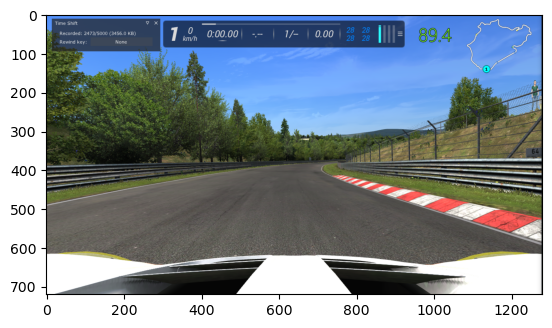

In [16]:
plt.imshow(cv2.cvtColor(game_frames[0], cv2.COLOR_BGR2RGB))
plt.show()

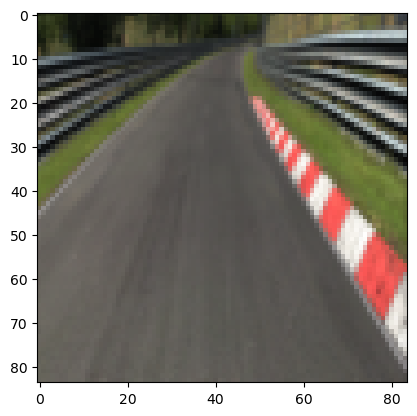

In [17]:
plt.imshow(cv2.cvtColor(processed_game_frames[0], cv2.COLOR_BGR2RGB))
plt.show()

***
### Testing new framestack logic

In [1]:
from framestack import FrameStack
import cv2
import numpy as np
from game_state import GameState
import datetime
import keyboard
import pyautogui
import win32gui
import win32ui
import win32con
from utils import move_window_to_top_left
from torchvision import transforms
from time import sleep
import matplotlib.pyplot as plt
from collections import deque
import torch
import pandas as pd
from PIL import Image

In [5]:
# Create a deque object
my_deque = deque(maxlen=13)

In [8]:
my_deque.appendleft(1)

In [9]:
len(my_deque)

1

In [10]:
# Add elements to the deque
for i in range(1, 26):
    my_deque.appendleft(i)

In [11]:
print(my_deque)
print(len(my_deque))

deque([25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13], maxlen=13)
13


In [15]:
# Get every 4th frame
every_4th_frame = np.array(my_deque)[0::4]

print(every_4th_frame)

[25 21 17 13]


***


In [1]:
import numpy as np

In [8]:
arr = np.random.randint(256, size=(4, 720, 1280, 3), dtype=np.uint8)
arr.shape

(4, 720, 1280, 3)

In [9]:
4*720*1280*3

11059200

In [7]:
np.array(arr.shape).prod()

11059200

In [10]:
import torch

# Create a tensor with requires_grad=True (gradient tracking enabled)
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

# Some computation that you don't want to track gradients for
with torch.no_grad():
    y = x * 2
    z = y.mean()

# The following line would raise an error because requires_grad=True is required for gradient computation
# z.backward()

# Accessing the gradients will give None
print(x.grad)  # None

None


***
### Testing new framestack await logic

In [5]:
from gamestate import GameState
from time import sleep

In [4]:
gamestate = GameState()
framestack = gamestate.get_framestack_tensor()
print(framestack.shape)
gamestate.close()

(4, 84, 84, 3)


In [7]:
gamestate = GameState()
framestack1 = gamestate.get_framestack_tensor()
print(framestack1.shape)
sleep(1)
framestack2 = gamestate.get_framestack_tensor()
print(framestack2.shape)
gamestate.close()

(4, 84, 84, 3)
(4, 84, 84, 3)
